In [1]:
import numpy as np
import astra
import tomopy
import matplotlib.pyplot as plt
import os, fnmatch
from os import listdir
from astropy.io import fits
%matplotlib notebook
# %matplotlib inline
from skimage import io

## In the first part I read the images and create the white beam  by summing all time bins 

In [2]:
rootpath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/'
coll_dir = sorted(fnmatch.filter(listdir(rootpath),'Sample*'))
pathOB= "/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/"


In [3]:
print(coll_dir)

['Sample_10090deg_Corrected', 'Sample_10090deg_Corrected_Binned', 'Sample_10099deg_Corrected', 'Sample_10099deg_Corrected_Binned', 'Sample_10108deg_Corrected', 'Sample_10108deg_Corrected_Binned', 'Sample_10117deg_Corrected', 'Sample_10117deg_Corrected_Binned', 'Sample_10126deg_Corrected', 'Sample_10126deg_Corrected_Binned', 'Sample_10135deg_Corrected', 'Sample_10135deg_Corrected_Binned', 'Sample_10144deg_Corrected', 'Sample_10144deg_Corrected_Binned', 'Sample_10153deg_Corrected', 'Sample_10153deg_Corrected_Binned', 'Sample_10162deg_Corrected', 'Sample_10162deg_Corrected_Binned', 'Sample_10171deg_Corrected', 'Sample_10171deg_Corrected_Binned', 'Sample_10180deg_Corrected', 'Sample_10180deg_Corrected_Binned']


In [4]:
proj = np.zeros([11,512,512])
print(np.shape(proj))

(11, 512, 512)


In [5]:
# read projs, create summed Img and put it in the proj

In [6]:
coll_files=[]
for i in range(0, len(coll_dir)):
# for i in range(0, 1):
    pathdata = rootpath + coll_dir[i]
    print(pathdata)
    coll_files.append(sorted(fnmatch.filter(listdir(pathdata),'*.fits')))

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)

/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10117deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10126deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10135deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10144deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10153deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10162deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected


In [7]:

for i in range(0, len(coll_files)):
    curr_img = np.zeros([512,512])
    for j in range(0, len(coll_files[i])):
        name = rootpath + coll_dir[i]+'/'+coll_files[i][j]
        with fits.open(name) as f:
            curr_img += f[0].data
    proj[i]=curr_img

In [8]:
print(len(coll_files))
print(len(coll_files[0]))
print(np.shape(proj))

11
2451
(11, 512, 512)


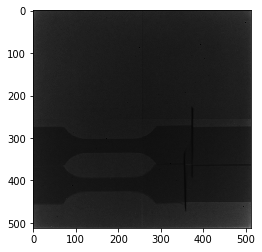

In [9]:
plt.figure()
plt.imshow(proj[0],cmap='gray')

In [10]:
for i in range(0, len(proj)):
    proj[i] = np.rot90(proj[i])

<IPython.core.display.Javascript object>


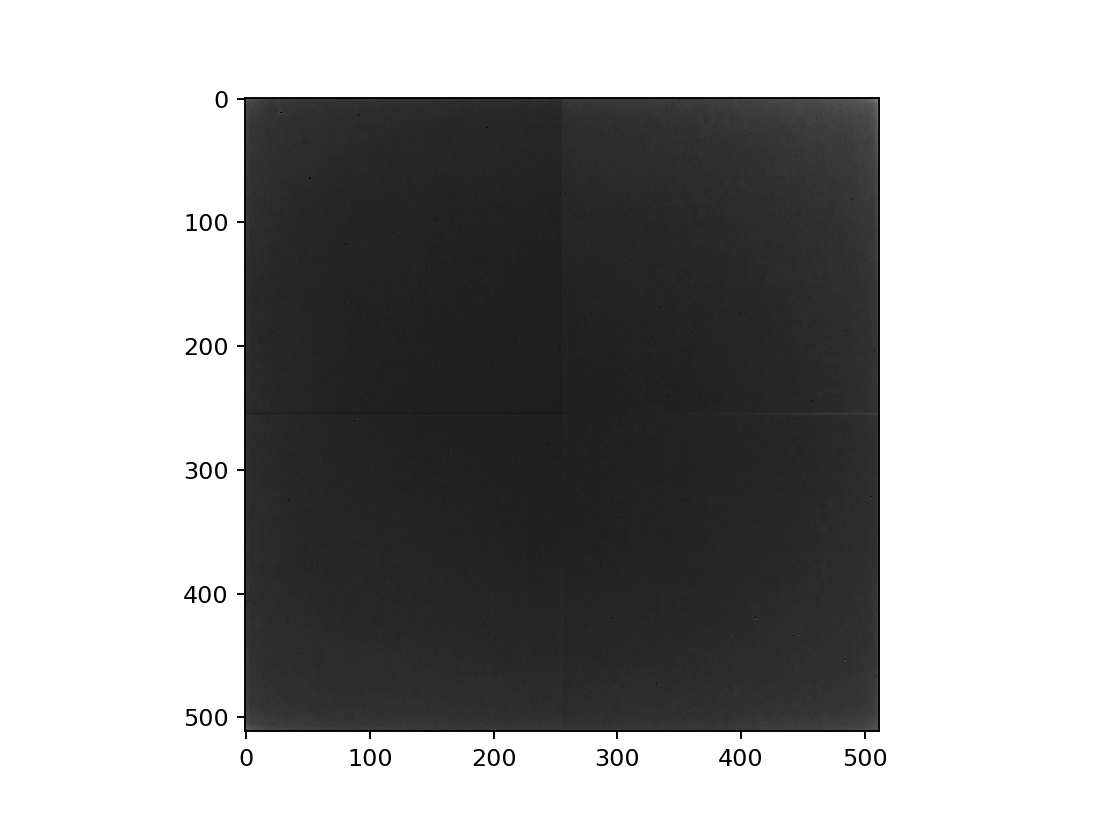

In [36]:
savepath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_imgs/'
curr_ob = np.zeros([512,512])

for i in range(0, len(coll_ob)):
    name = pathOB +coll_ob[i]
    with fits.open(name) as f:
        curr_ob += f[0].data
        
curr_ob = np.rot90(curr_ob)
plt.figure()
plt.imshow(curr_ob,cmap='gray')
fits.writeto(savepath+'Summed_ob.fits',curr_ob.astype(float))

In [38]:

print(coll_dir[0])
for i in range(0, len(proj)):
    proj[i][:,:] = proj[i][:,:].astype(float)
#     io.imsave(savepath+'Summed_img_'+coll_dir[i]+'.tif', proj[i][:,:].astype(float))
    fits.writeto(savepath+'Summed_img_'+str(i).zfill(4)+'.fits', proj[i][:,:].astype(float))
    



Sample_10090deg_Corrected


## Second part, I read the summed images that were processed in KipTool and ImageJ and try now to reconstruct.. 

In [2]:
# here I read the processed datasets with KipTool, lognorm + outliers removal in ImageJ

path_processed = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_Imgs_LogNorm_Cleaned/'
myfiles = sorted(fnmatch.filter(listdir(path_processed),'*.tif'))
print(myfiles)

['Summed_Imgs_LogNorm_Cleaned_0000.tif', 'Summed_Imgs_LogNorm_Cleaned_0001.tif', 'Summed_Imgs_LogNorm_Cleaned_0002.tif', 'Summed_Imgs_LogNorm_Cleaned_0003.tif', 'Summed_Imgs_LogNorm_Cleaned_0004.tif', 'Summed_Imgs_LogNorm_Cleaned_0005.tif', 'Summed_Imgs_LogNorm_Cleaned_0006.tif', 'Summed_Imgs_LogNorm_Cleaned_0007.tif', 'Summed_Imgs_LogNorm_Cleaned_0008.tif', 'Summed_Imgs_LogNorm_Cleaned_0009.tif', 'Summed_Imgs_LogNorm_Cleaned_0010.tif']


In [3]:
myproj=np.zeros([11,481,348])
for i in range(0, len(myfiles)):
    myproj[i][:,:] = io.imread(path_processed+myfiles[i])

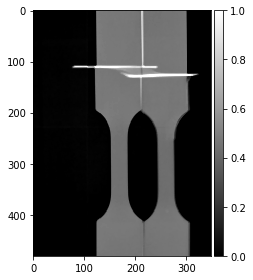

In [4]:
io.imshow(myproj[0], cmap='gray', vmin=0.0, vmax=1.0)

In [5]:
theta=tomopy.angles(11, 90)
print(theta)

[1.57079633 1.72787596 1.88495559 2.04203522 2.19911486 2.35619449
 2.51327412 2.67035376 2.82743339 2.98451302 3.14159265]


In [6]:
rec_sart_1 = tomopy.recon(myproj[:,300:305,:]/(11*0.0055), theta, algorithm=tomopy.astra,
                       options={'method':'SART', 'num_iter':10*180,
                       'proj_type':'linear',
                       'extra_options':{'MinConstraint':0,'ProjectionOrder':'sequential'}})

In [30]:
rec_sart_2 = tomopy.recon(myproj[:,300:305,:]/(11*0.0055), theta, algorithm=tomopy.astra,                      
                          init_recon=rec_sart_1, # the initialization does not work, or does not provide any difference
                           options={'method':'SART', 'num_iter':10*180,
                           'proj_type':'linear',
                                    'extra_options':{'MinConstraint':0,'ProjectionOrder':'sequential'}})
#                            'extra_options':{'MinConstraint':0,'ProjectionOrder':'sequential','ReconstructionDataId':rec_sart_1}})

(5, 348, 348)


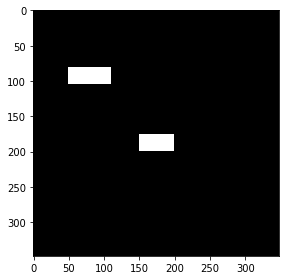

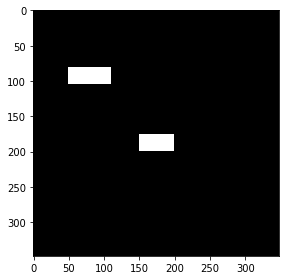

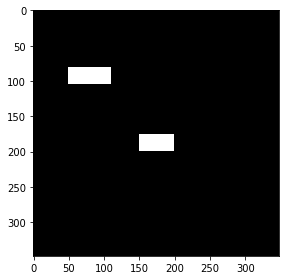

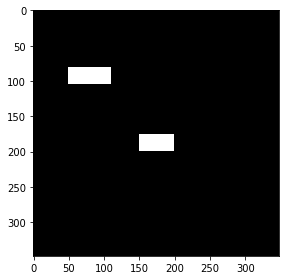

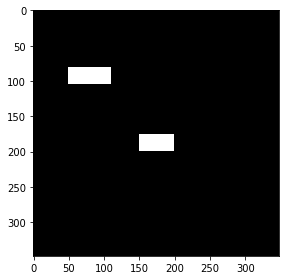

In [77]:
rec_mask = np.zeros(np.shape(rec_sart_1), dtype=float)
print(np.shape(rec_mask))

for i in range(0,5):
    rec_mask[i,80:105,50:110] =1.0
    rec_mask[i,175:200,150:200] =1.0
    plt.figure()
    io.imshow(rec_mask[i])

In [95]:
vol_geom = astra.create_vol_geom(348,348)
astra_ini = astra.data2d.create('-vol', vol_geom,rec_sart_1[0,:,:])
# mask_id = astra.data2d.create('-vol', vol_geom, rec_mask[0,:,:].astype(float))

c = np.linspace(-174.5,164.5,348)
x, y = np.meshgrid(c,c)
mask = np.array((x**2 + y**2 < 127.5**2),dtype=np.float)

# Create a data object for the mask
# mask_id = astra.data2d.create('-vol', vol_geom, mask)
mask_id = astra.data2d.create('-vol', vol_geom, (rec_mask[0]).astype(float))


print(type(astra_mask), np.shape(astra_ini))


rec_sart_3 = tomopy.recon(myproj[:,300:305,:]/(11*0.0055), theta, algorithm=tomopy.astra,                      
#                           init_recon=rec_sart_1, # the initialization does not work, or does not provide any difference
                           options={'method':'SART', 'num_iter':10*180,
                           'proj_type':'linear',
                            'extra_options':{'MinConstraint':0,'ProjectionOrder':'sequential',
                                             'ReconstructionDataId':astra_ini,
                                             'ReconstructionMaskId':mask_id}}
                         )

<class 'int'> ()


In [96]:
print(np.shape(rec_sart_1), np.min(rec_sart_1), np.max(rec_sart_1))
print(np.shape(rec_sart_2), np.min(rec_sart_2), np.max(rec_sart_2))
print(np.shape(rec_sart_3), np.min(rec_sart_3), np.max(rec_sart_3))
print(np.shape(myproj))

(5, 348, 348) 0.0 0.46767545
(5, 348, 348) 0.0 0.46767545
(5, 348, 348) 0.0 6.0673466
(11, 481, 348)


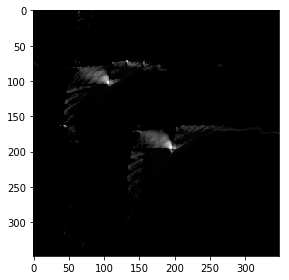

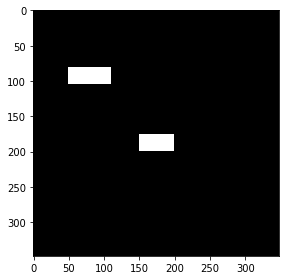

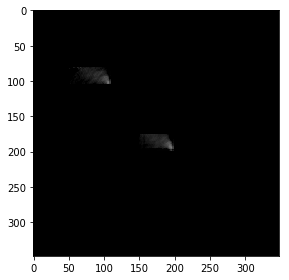

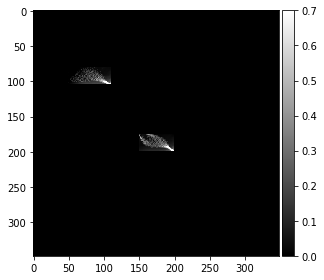

In [98]:
plt.figure()
io.imshow(rec_sart_1[2,:,:], cmap='gray', vmin=0.0, vmax=0.46)
plt.figure()
io.imshow(rec_mask[2,:,:])
plt.figure()
io.imshow(rec_sart_1[2,:,:]*rec_mask[2,:,:])
plt.figure()
io.imshow(rec_sart_3[2,:,:], cmap='gray', vmin=0.0, vmax=0.7)

-0.46694782 1e-06


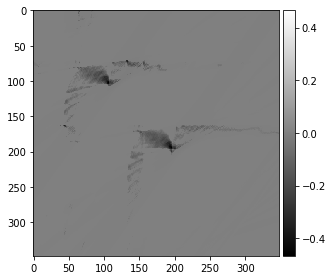

In [80]:
io.imshow(rec_sart_3[1,:,:]-rec_sart_1[1,:,:], cmap='gray')
print(np.min(rec_sart_3[1,:,:]-rec_sart_1[1,:,:]), np.max(rec_sart_3[1,:,:]-rec_sart_1[1,:,:]))

In [71]:
recon_gridrec = tomopy.recon(myproj/(11*0.0055),theta, algorithm='gridrec')

<IPython.core.display.Javascript object>


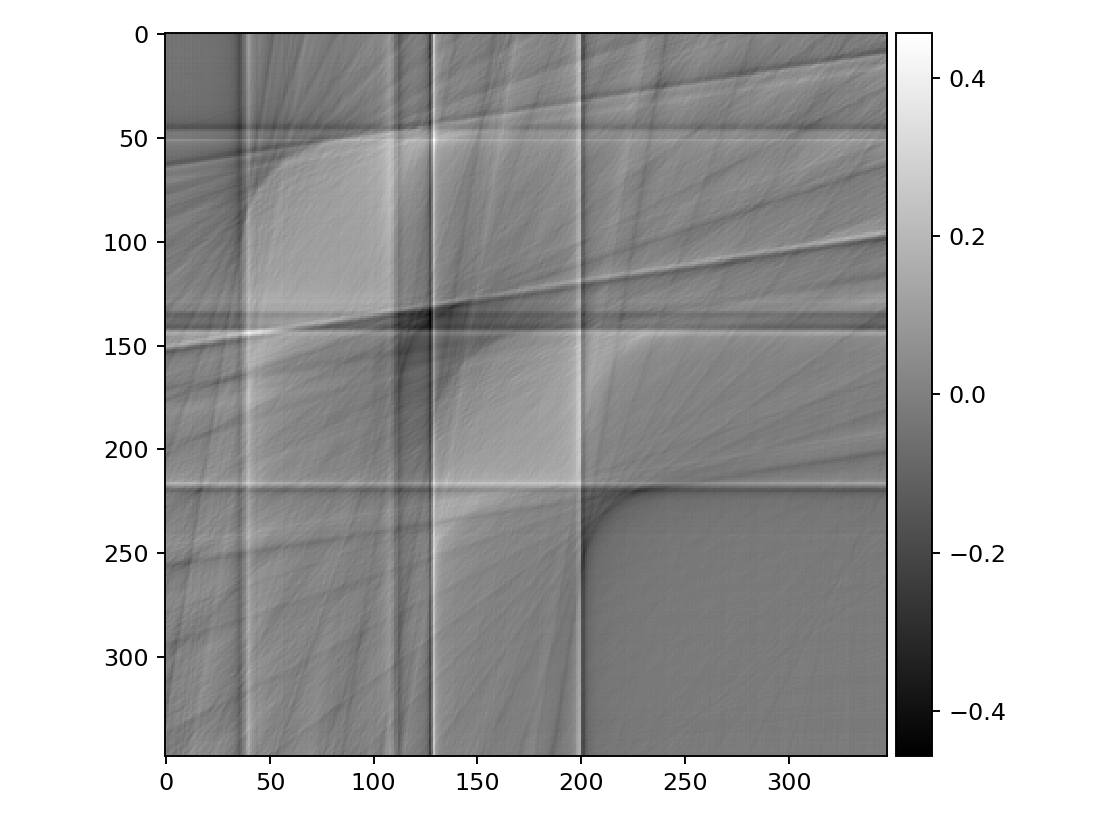

In [72]:
io.imshow(recon_gridrec[200,:,:], cmap='gray')

In [ ]:
rec_sirt = tomopy.recon(myproj/(11*0.0055), theta, algorithm=tomopy.astra,
       options={'method':'SIRT_CUDA', 'num_iter':10*180,
       'proj_type':'cuda',
       'extra_options':{'MinConstraint':0}})
# This one takes forever.. probably not the best solution then 

<IPython.core.display.Javascript object>


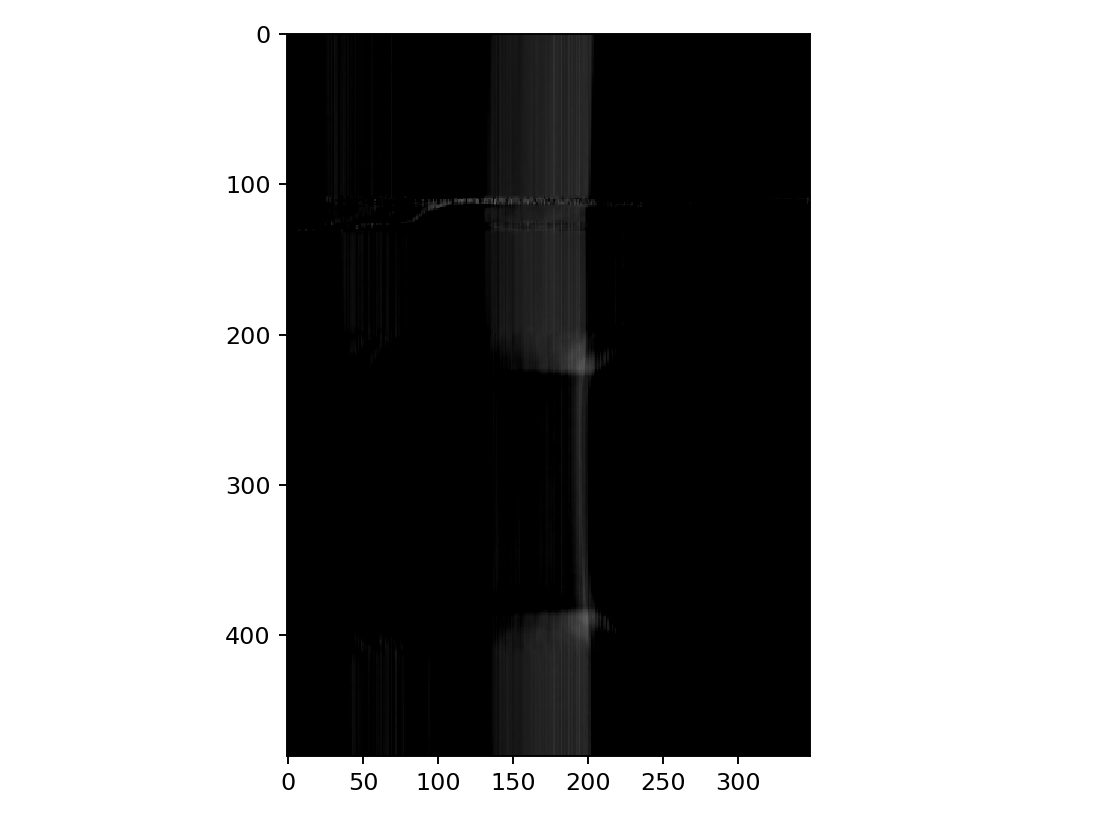

In [95]:
io.imshow(rec_sirt[:,200,:], cmap='gray')

In [50]:
print(type(rec_mask))

<class 'numpy.ndarray'>


## Astra alone 

In [99]:
# import astra
# import numpy as np

# # In this example we will create a reconstruction in a circular region,
# # instead of the usual rectangle.

# # This is done by placing a circular mask on the square reconstruction volume:

# c = np.linspace(-127.5,127.5,256)
# x, y = np.meshgrid(c,c)
# mask = np.array((x**2 + y**2 < 127.5**2),dtype=np.float)

# import pylab
# pylab.gray()
# pylab.figure(1)
# pylab.imshow(mask)

# vol_geom = astra.create_vol_geom(256, 256)
# proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,50,False))

# # As before, create a sinogram from a phantom
# import scipy.io
# P = scipy.io.loadmat('phantom.mat')['phantom256']
# proj_id = astra.create_projector('cuda',proj_geom,vol_geom)
# sinogram_id, sinogram = astra.create_sino(P, proj_id)

# pylab.figure(2)
# pylab.imshow(P)
# pylab.figure(3)
# pylab.imshow(sinogram)

# # Create a data object for the reconstruction
# rec_id = astra.data2d.create('-vol', vol_geom)

# # Create a data object for the mask
# mask_id = astra.data2d.create('-vol', vol_geom, mask)

# # Set up the parameters for a reconstruction algorithm using the GPU
# cfg = astra.astra_dict('SIRT_CUDA')
# cfg['ReconstructionDataId'] = rec_id
# cfg['ProjectionDataId'] = sinogram_id
# cfg['option'] = {}
# cfg['option']['ReconstructionMaskId'] = mask_id

# # Create the algorithm object from the configuration structure
# alg_id = astra.algorithm.create(cfg)

# # Run 150 iterations of the algorithm
# astra.algorithm.run(alg_id, 150)

# # Get the result
# rec = astra.data2d.get(rec_id)

# pylab.figure(4)
# pylab.imshow(rec)

# pylab.show()

# # Clean up. Note that GPU memory is tied up in the algorithm object,
# # and main RAM in the data objects.
# astra.algorithm.delete(alg_id)
# astra.data2d.delete(mask_id)
# astra.data2d.delete(rec_id)
# astra.data2d.delete(sinogram_id)
# astra.projector.delete(proj_id)